# NLP

In [2]:
# import library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import helper_function as hf

## Preprocessing data

In [7]:
# load and visualizing a text data
train = pd.read_csv("nlp-getting-started/train.csv")
test = pd.read_csv("nlp-getting-started/test.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
# shuffle training data
train = train.sample(frac=1, random_state=42)
train.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
# number of samples in classes
train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [14]:
# visualize random example
import random
random_index = random.randint(0, len(train)-5)
for row in train[["text", "target"]][random_index:random_index+5].itertuples():
    _, text, target = row
    print("Target: {}".format(target), "real disaster" if target > 0 else "not real disaster")
    print("Text:\n {}".format(text))
    print("---\n")

Target: 0 not real disaster
Text:
 @Volfan326 @TNeazzy Mizzou has annihilated florida the past 2 seasons even ended muschamp's career just can't compete with Bama
---

Target: 0 not real disaster
Text:
 Bitch done blew my shit up
---

Target: 1 real disaster
Text:
 Alleged driver in #Kuwait attack 'joined Daesh just a day before the June 26 suicide bombing' he confesses in court http://t.co/Tmz6X1N2gQ
---

Target: 1 real disaster
Text:
 kindermorgan gas explosion
---

Target: 0 not real disaster
Text:
 @danisnotonfire if you follow me I will go into town and advertise your youtube channel by screaming and walking around with a sign. Pls??
---



In [33]:
# get validation data
from sklearn.model_selection import train_test_split
train_sentence, val_sentence, train_label, val_label = train_test_split(train["text"].to_numpy(),
                                                                        train["target"].to_numpy(),
                                                                        test_size=0.1)


In [112]:
# tokenization - convert string to numbers
# embedding - representation of relationship between tokens (another input for neural network)
tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=None, #how many words in vocabulary
                                                                    standardize = "lower_and_strip_punctuation",
                                                                    split = "whitespace",
                                                                    ngrams = None, #create groups of n-words
                                                                    output_mode = "int",
                                                                    output_sequence_length = None, #how long sequences want to be
                                                                    )

In [31]:
# setup text vectorization variables
max_vocab_length = 10000 # max number
max_length = 15 # how many words model see

text_vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=max_vocab_length, #how many words in vocabulary
                                                                                output_mode = "int",
                                                                                output_sequence_length = max_length #how long sequences want to be
                                                                                )

In [34]:
# Fit the text vectorizer to the train text
text_vectorizer.adapt(train_sentence)

In [35]:
text = "Och you touche my tralala!"
text_vectorizer([text])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=array([[ 1, 12,  1, 13,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])>

In [37]:
# check random sentence
random_sentence = random.choice(train_sentence)
print("Original sentence:\n{}".format(random_sentence))
print("Vectorized text: \n{}".format(text_vectorizer([random_sentence])))

Original sentence:
@soapscoop i need you to confirm that ross is dead cause i dont trust anyone else yh
Vectorized text: 
[[8333    8  158   12    5 2162   15 1359    9  111  245    8   60  836
   666]]


In [40]:
# uniq words in vocabulary
vocabulary = text_vectorizer.get_vocabulary()
print("Words in vocabulary: {}".format(len(vocabulary)))
print("Most popular words {}".format(vocabulary[:5]))
print("Least popular words: {}".format(vocabulary[-5:]))

Words in vocabulary: 10000
Most popular words ['', '[UNK]', 'the', 'a', 'in']
Least popular words: ['paid', 'paging', 'pages', 'pageparkescorp', 'pagasa']


In [41]:
# creating embedding
embedding = tf.keras.layers.Embedding(input_dim = max_vocab_length, # input shape
                                        output_dim=128, # output shape
                                        input_length = max_length # how long is each input
                                        )

In [47]:
random_sentence = random.choice(train_sentence)
print("Original version:\n{}".format(random_sentence))
print("Embedded version:\n{}".format(embedding(text_vectorizer([random_sentence]))))
np.shape(embedding(text_vectorizer([random_sentence])))

Original version:
The feeling of lonelyness has sunk into me strange depressing feeling.
Embedded version:
[[[ 3.7184898e-02 -3.2395519e-02  2.9373001e-02 ... -4.7757603e-02
    2.1887649e-02 -3.2435238e-02]
  [-2.9900050e-02 -9.4767921e-03 -4.6010878e-02 ... -5.8295950e-03
    9.7265132e-03  8.6762011e-05]
  [-3.9687406e-02  2.8739717e-02  2.1658961e-02 ... -3.1411134e-02
   -2.9552734e-02  2.3835849e-02]
  ...
  [ 1.4170554e-02 -8.2284696e-03 -1.1513721e-02 ...  3.4373078e-02
    2.7040590e-02 -2.4641706e-02]
  [ 1.4170554e-02 -8.2284696e-03 -1.1513721e-02 ...  3.4373078e-02
    2.7040590e-02 -2.4641706e-02]
  [ 1.4170554e-02 -8.2284696e-03 -1.1513721e-02 ...  3.4373078e-02
    2.7040590e-02 -2.4641706e-02]]]


TensorShape([1, 15, 128])

## Model 0 Naive Bayes

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # convert words to numbers
    ("clf", MultinomialNB()) # model the text
])

# fit the pipline to training data
model_0.fit(train_sentence, train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [52]:
# evaluate model
print("Baseline model accuracy {}".format(model_0.score(val_sentence, val_label)))

Baseline model accuracy 0.7847769028871391


In [104]:
def summary(model_pred, val_label):
    print(metrics.classification_report(val_label, model_pred))

    print("confusion matrix:")
    print(metrics.confusion_matrix(val_label, model_pred))

    print('------------------------------')

In [106]:
model_0_pred = model_0.predict(val_sentence)
summary(model_0_pred, val_label)

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       440
           1       0.84      0.61      0.70       322

    accuracy                           0.78       762
   macro avg       0.80      0.76      0.77       762
weighted avg       0.79      0.78      0.78       762

confusion matrix:
[[403  37]
 [127 195]]
------------------------------


## Model 1 Feed-forward neural network

In [118]:
max_vocab_length = 10000 # max number
max_length = 15 # how many words model see

text_vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=max_vocab_length, #how many words in vocabulary
                                                                                output_mode = "int",
                                                                                output_sequence_length = max_length) #how long sequences want to be)
# fit
text_vectorizer.adapt(train_sentence)

embedding = tf.keras.layers.Embedding(input_dim = max_vocab_length, # input shape
                                        output_dim=128, # output shape
                                        input_length = max_length) # how long is each input)

# Input layer
input = tf.keras.layers.Input(shape = (1,), dtype = "string") # number of input is automatically define

# define the model
x = text_vectorizer(input)
x = embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
output = tf.keras.layers.Dense(1, activation = "sigmoid")(x)
model_1 = tf.keras.Model(input, output)

# compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_26 (Text  (None, 15)               0         
 Vectorization)                                                  
                                                                 
 embedding_23 (Embedding)    (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_20  (None, 128)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_41 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-tr

In [119]:
# Fit the model
model_1_history = model_1.fit(train_sentence, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_label,
                              epochs=5,
                              validation_data=(val_sentence, val_label))

Epoch 1/5
215/215 [==============================] - 6s 25ms/step - loss: 0.6118 - accuracy: 0.6946 - val_loss: 0.5373 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.4400 - accuracy: 0.8203 - val_loss: 0.4774 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.3451 - accuracy: 0.8610 - val_loss: 0.4671 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 5s 23ms/step - loss: 0.2818 - accuracy: 0.8937 - val_loss: 0.4794 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 5s 26ms/step - loss: 0.2337 - accuracy: 0.9149 - val_loss: 0.5066 - val_accuracy: 0.7717


In [120]:
model_1_pred = (model_1.predict(val_sentence)>0.5)
summary(model_1_pred, val_label)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       440
           1       0.76      0.68      0.72       322

    accuracy                           0.77       762
   macro avg       0.77      0.76      0.76       762
weighted avg       0.77      0.77      0.77       762

confusion matrix:
[[369  71]
 [103 219]]
------------------------------


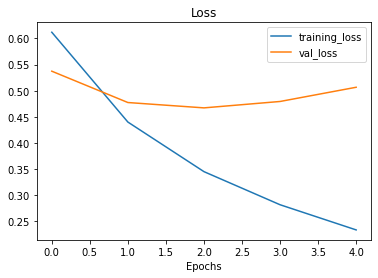

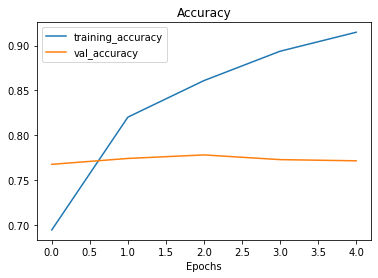

In [121]:
hf.plot_loss_curves(model_1_history)

## RNN LSTM - long short term memory model

In [133]:
# create LSTM model
input = tf.keras.layers.Input(shape=(1,), dtype = "string")
x = text_vectorizer(input)
x = embedding(x)

x = tf.keras.layers.LSTM(units = 64, return_sequences = True)(x) # return_sequences return 3D 
x = tf.keras.layers.LSTM(units = 64)(x) # base inputs are nice
#x = tf.keras.layers.Dense(64, activation = "relu")(x)
output = tf.keras.layers.Dense(1, activation = "sigmoid")(x)

model_2 = tf.keras.Model(input, output)

model_2.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["acc"])
model_2.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_26 (Text  (None, 15)               0         
 Vectorization)                                                  
                                                                 
 embedding_23 (Embedding)    (None, 15, 128)           1280000   
                                                                 
 lstm_16 (LSTM)              (None, 15, 64)            49408     
                                                                 
 lstm_17 (LSTM)              (None, 64)                33024     
                                                                 
 dense_57 (Dense)            (None, 1)                 65        
                                                          

In [134]:
model_2_history = model_2.fit(train_sentence, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_label,
                              epochs=5,
                              validation_data=(val_sentence, val_label))

Epoch 1/5
215/215 [==============================] - 24s 77ms/step - loss: 0.1391 - acc: 0.9556 - val_loss: 1.1386 - val_acc: 0.7441
Epoch 2/5
215/215 [==============================] - 15s 70ms/step - loss: 0.0691 - acc: 0.9718 - val_loss: 0.9121 - val_acc: 0.7349
Epoch 3/5
215/215 [==============================] - 15s 71ms/step - loss: 0.0574 - acc: 0.9746 - val_loss: 1.2358 - val_acc: 0.7467
Epoch 4/5
215/215 [==============================] - 16s 75ms/step - loss: 0.0496 - acc: 0.9775 - val_loss: 1.4630 - val_acc: 0.7257
Epoch 5/5
215/215 [==============================] - 18s 85ms/step - loss: 0.0465 - acc: 0.9799 - val_loss: 1.6312 - val_acc: 0.7205


In [135]:
model_2_pred = (model_2.predict(val_sentence)>0.5)
summary(model_2_pred, val_label)

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       440
           1       0.66      0.70      0.68       322

    accuracy                           0.72       762
   macro avg       0.71      0.72      0.72       762
weighted avg       0.72      0.72      0.72       762

confusion matrix:
[[323 117]
 [ 96 226]]
------------------------------


## RNN GRU - gated recurrent unit

In [139]:
# create LSTM model
input = tf.keras.layers.Input(shape=(1,), dtype = "string")
x = text_vectorizer(input)
x = embedding(x)

x = tf.keras.layers.GRU(units = 64, return_sequences = True)(x) # return_sequences return 3D 
x = tf.keras.layers.GRU(units = 64,return_sequences = True)(x) # base inputs are nice
x = tf.keras.layers.LSTM(units = 64)(x)
output = tf.keras.layers.Dense(1, activation = "sigmoid")(x)

model_3 = tf.keras.Model(input, output)

model_3.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["acc"])
model_3.summary()

Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_26 (Text  (None, 15)               0         
 Vectorization)                                                  
                                                                 
 embedding_23 (Embedding)    (None, 15, 128)           1280000   
                                                                 
 gru_4 (GRU)                 (None, 15, 64)            37248     
                                                                 
 gru_5 (GRU)                 (None, 15, 64)            24960     
                                                                 
 lstm_19 (LSTM)              (None, 64)                33024     
                                                          

In [140]:
model_3_history = model_3.fit(train_sentence, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_label,
                              epochs=5,
                              validation_data=(val_sentence, val_label))

Epoch 1/5
215/215 [==============================] - 28s 94ms/step - loss: 0.1072 - acc: 0.9651 - val_loss: 1.0167 - val_acc: 0.7205
Epoch 2/5
215/215 [==============================] - 18s 86ms/step - loss: 0.0488 - acc: 0.9784 - val_loss: 1.3973 - val_acc: 0.7205
Epoch 3/5
215/215 [==============================] - 18s 86ms/step - loss: 0.0391 - acc: 0.9815 - val_loss: 1.9337 - val_acc: 0.7192
Epoch 4/5
215/215 [==============================] - 19s 87ms/step - loss: 0.0400 - acc: 0.9822 - val_loss: 1.5547 - val_acc: 0.7126
Epoch 5/5
215/215 [==============================] - 21s 100ms/step - loss: 0.0375 - acc: 0.9819 - val_loss: 1.4152 - val_acc: 0.7205


## RNN bidirectional

In [148]:
# create LSTM model
input = tf.keras.layers.Input(shape=(1,), dtype = "string")
x = text_vectorizer(input)
x = embedding(x)

x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5, return_sequences = True))(x) # return_sequences return 3D 
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(5))(x) # return_sequences return 3D 

output = tf.keras.layers.Dense(1, activation = "sigmoid")(x)

model_4 = tf.keras.Model(input, output)

model_4.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["acc"])
model_4.summary()



Model: "model_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_26 (Text  (None, 15)               0         
 Vectorization)                                                  
                                                                 
 embedding_23 (Embedding)    (None, 15, 128)           1280000   
                                                                 
 bidirectional_7 (Bidirectio  (None, 15, 10)           5360      
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 10)               510       
 nal)                                                            
                                                          

In [149]:
model_4_history = model_4.fit(train_sentence, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_label,
                              epochs=5,
                              validation_data=(val_sentence, val_label))

Epoch 1/5
215/215 [==============================] - 27s 75ms/step - loss: 0.2156 - acc: 0.9527 - val_loss: 0.8666 - val_acc: 0.7139
Epoch 2/5
215/215 [==============================] - 14s 65ms/step - loss: 0.0568 - acc: 0.9806 - val_loss: 1.0753 - val_acc: 0.7113
Epoch 3/5
215/215 [==============================] - 13s 63ms/step - loss: 0.0437 - acc: 0.9816 - val_loss: 1.1541 - val_acc: 0.7165
Epoch 4/5
215/215 [==============================] - 14s 65ms/step - loss: 0.0385 - acc: 0.9818 - val_loss: 1.1849 - val_acc: 0.7205
Epoch 5/5
215/215 [==============================] - 14s 65ms/step - loss: 0.0351 - acc: 0.9839 - val_loss: 1.2497 - val_acc: 0.7178
